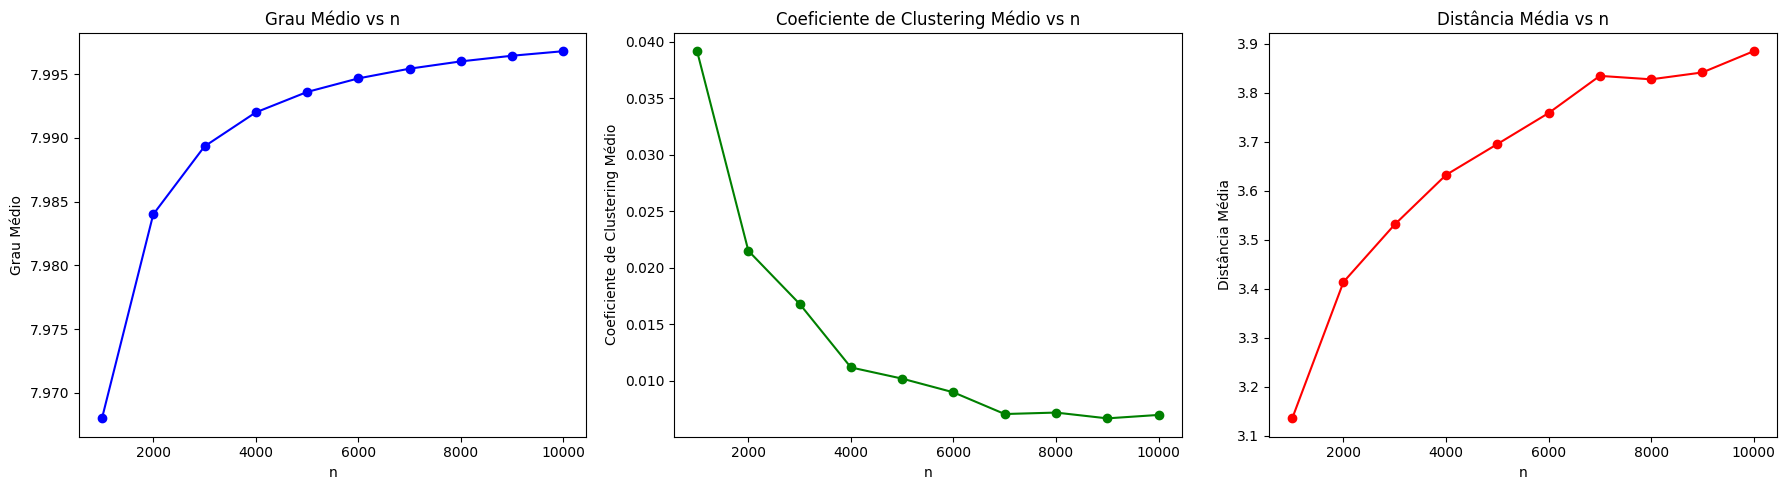

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

m=4
n_values = np.arange(1000, 11000, 1000)

# Listas para armazenar as métricas
grau_medio_list = []
clustering_list = []
distancia_media_list = []

for n in n_values:
    # Gerar a rede de Barabási-Albert
    G = nx.barabasi_albert_graph(n, m)
    
    # Calcular as métricas
    grau_medio = sum(dict(G.degree()).values()) / len(G)
    clustering = nx.average_clustering(G)
    
    # Nota: A distância média pode não estar bem definida para redes desconexas
    if nx.is_connected(G):
        distancia_media = nx.average_shortest_path_length(G)
    else:
        distancia_media = float('inf')
    
    # Armazenar as métricas
    grau_medio_list.append(grau_medio)
    clustering_list.append(clustering)
    distancia_media_list.append(distancia_media)

# Criar gráficos
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(n_values, grau_medio_list, marker='o', linestyle='-', color='b')
plt.title('Grau Médio vs n')
plt.xlabel('n')
plt.ylabel('Grau Médio')

plt.subplot(1, 3, 2)
plt.plot(n_values, clustering_list, marker='o', linestyle='-', color='g')
plt.title('Coeficiente de Clustering Médio vs n')
plt.xlabel('n')
plt.ylabel('Coeficiente de Clustering Médio')

plt.subplot(1, 3, 3)
plt.plot(n_values, distancia_media_list, marker='o', linestyle='-', color='r')
plt.title('Distância Média vs n')
plt.xlabel('n')
plt.ylabel('Distância Média')

plt.tight_layout()
plt.show()

In [7]:
# Criar uma lista de tuplas (n, grau_medio, clustering, distancia_media)
metricas = [(n, grau_medio, clustering, distancia_media) for n, grau_medio, clustering, distancia_media in zip(n_values, grau_medio_list, clustering_list, distancia_media_list)]

# Imprimir as tuplas
for n, grau_medio, clustering, distancia_media in metricas:
    print(f"(n = {n:.1f}: Grau Médio = {grau_medio}, Coeficiente de Clustering Médio = {clustering}, Distância Média = {distancia_media})")

(n = 1000.0: Grau Médio = 7.968, Coeficiente de Clustering Médio = 0.03918061068604186, Distância Média = 3.1356036036036037)
(n = 2000.0: Grau Médio = 7.984, Coeficiente de Clustering Médio = 0.02151539789293251, Distância Média = 3.413992996498249)
(n = 3000.0: Grau Médio = 7.989333333333334, Coeficiente de Clustering Médio = 0.016820209196584657, Distância Média = 3.5313315549627653)
(n = 4000.0: Grau Médio = 7.992, Coeficiente de Clustering Médio = 0.011197798977280477, Distância Média = 3.632410977744436)
(n = 5000.0: Grau Médio = 7.9936, Coeficiente de Clustering Médio = 0.010205923412921144, Distância Média = 3.695294018803761)
(n = 6000.0: Grau Médio = 7.994666666666666, Coeficiente de Clustering Médio = 0.008994586211669348, Distância Média = 3.758614324609657)
(n = 7000.0: Grau Médio = 7.9954285714285716, Coeficiente de Clustering Médio = 0.007074242106517477, Distância Média = 3.834558324658625)
(n = 8000.0: Grau Médio = 7.996, Coeficiente de Clustering Médio = 0.00720299627

Quantidade de nós: 5000
Quantidade de arestas: 19984


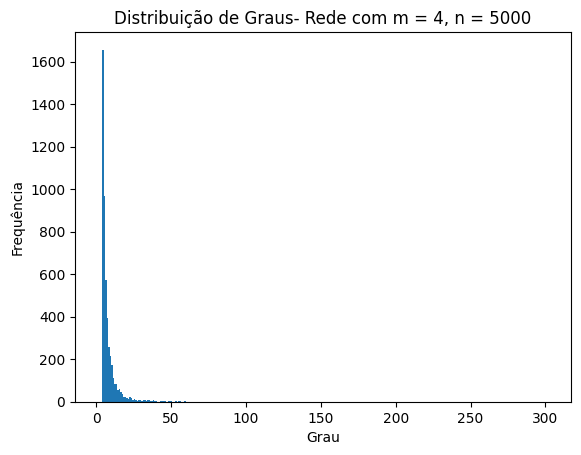

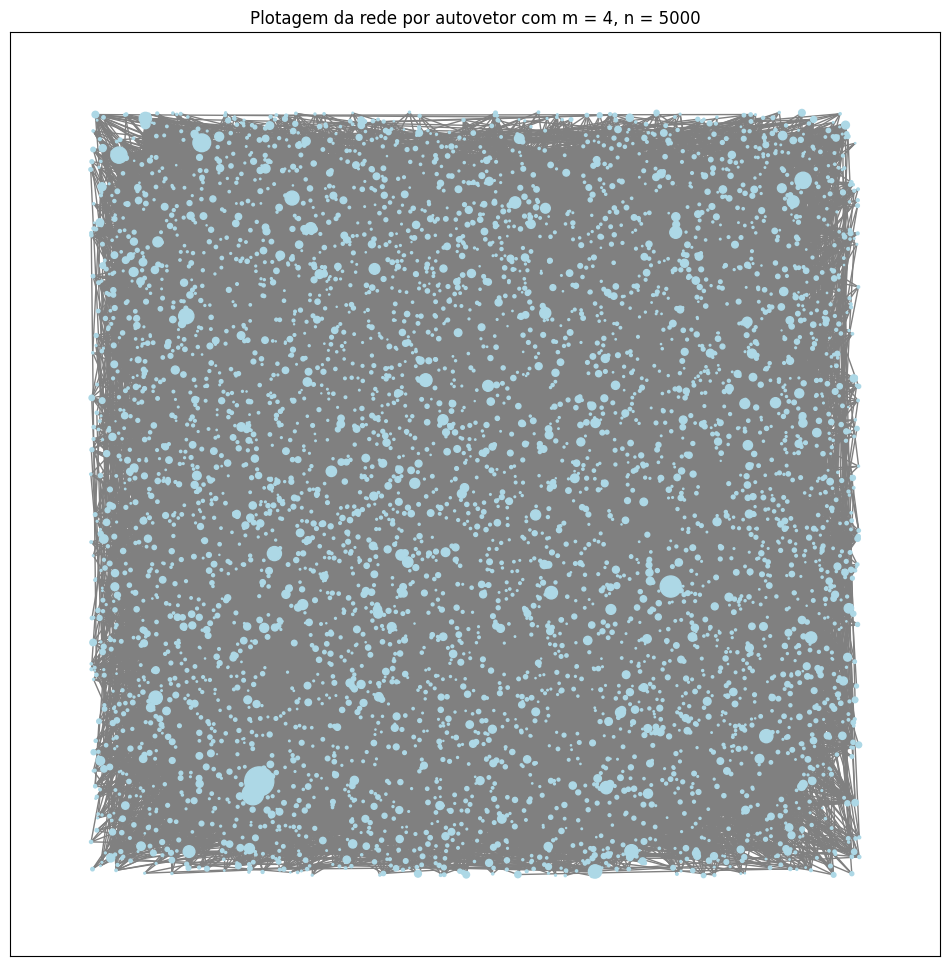

In [8]:
#Para n = 5000
n = 5000
m = 4

g = nx.barabasi_albert_graph(n,m)

# Calcular métricas para a rede
nodes = nx.number_of_nodes(g)
arestas = nx.number_of_edges(g)

# Plotar a distribuição de graus e a rede para Les Misérables
print(f'Quantidade de nós: {nodes}')
print(f'Quantidade de arestas: {arestas}')

# Função para plotar a distribuição de graus
def plot_grau_distribuicao(G, titulo):
    graus = [d for n, d in G.degree()]
    plt.hist(graus, bins=range(1, max(graus)+1))
    plt.title(titulo)
    plt.xlabel('Grau')
    plt.ylabel('Frequência')
    plt.show()

# Função para plotar a rede com centralidade de autovetor
def plot_rede(G, titulo):
    pos = nx.random_layout(G)
    centralidade = nx.eigenvector_centrality(G)
    tam_nos = [1000 * centralidade[n] for n in G.nodes()]

    plt.figure(figsize=(12, 12))
    nx.draw_networkx(G, pos, node_size=tam_nos, with_labels=False, node_color='lightblue', edge_color='gray')
    plt.title(titulo)
    plt.show()

plot_grau_distribuicao(g, 'Distribuição de Graus- Rede com m = 4, n = 5000')
plot_rede(g, 'Plotagem da rede por autovetor com m = 4, n = 5000')